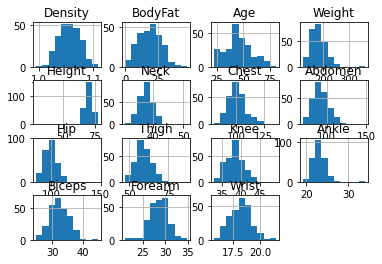

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
url='/content/bodyfat.csv'
data=pd.read_csv(url)
data.head()
data.hist()
plt.show()

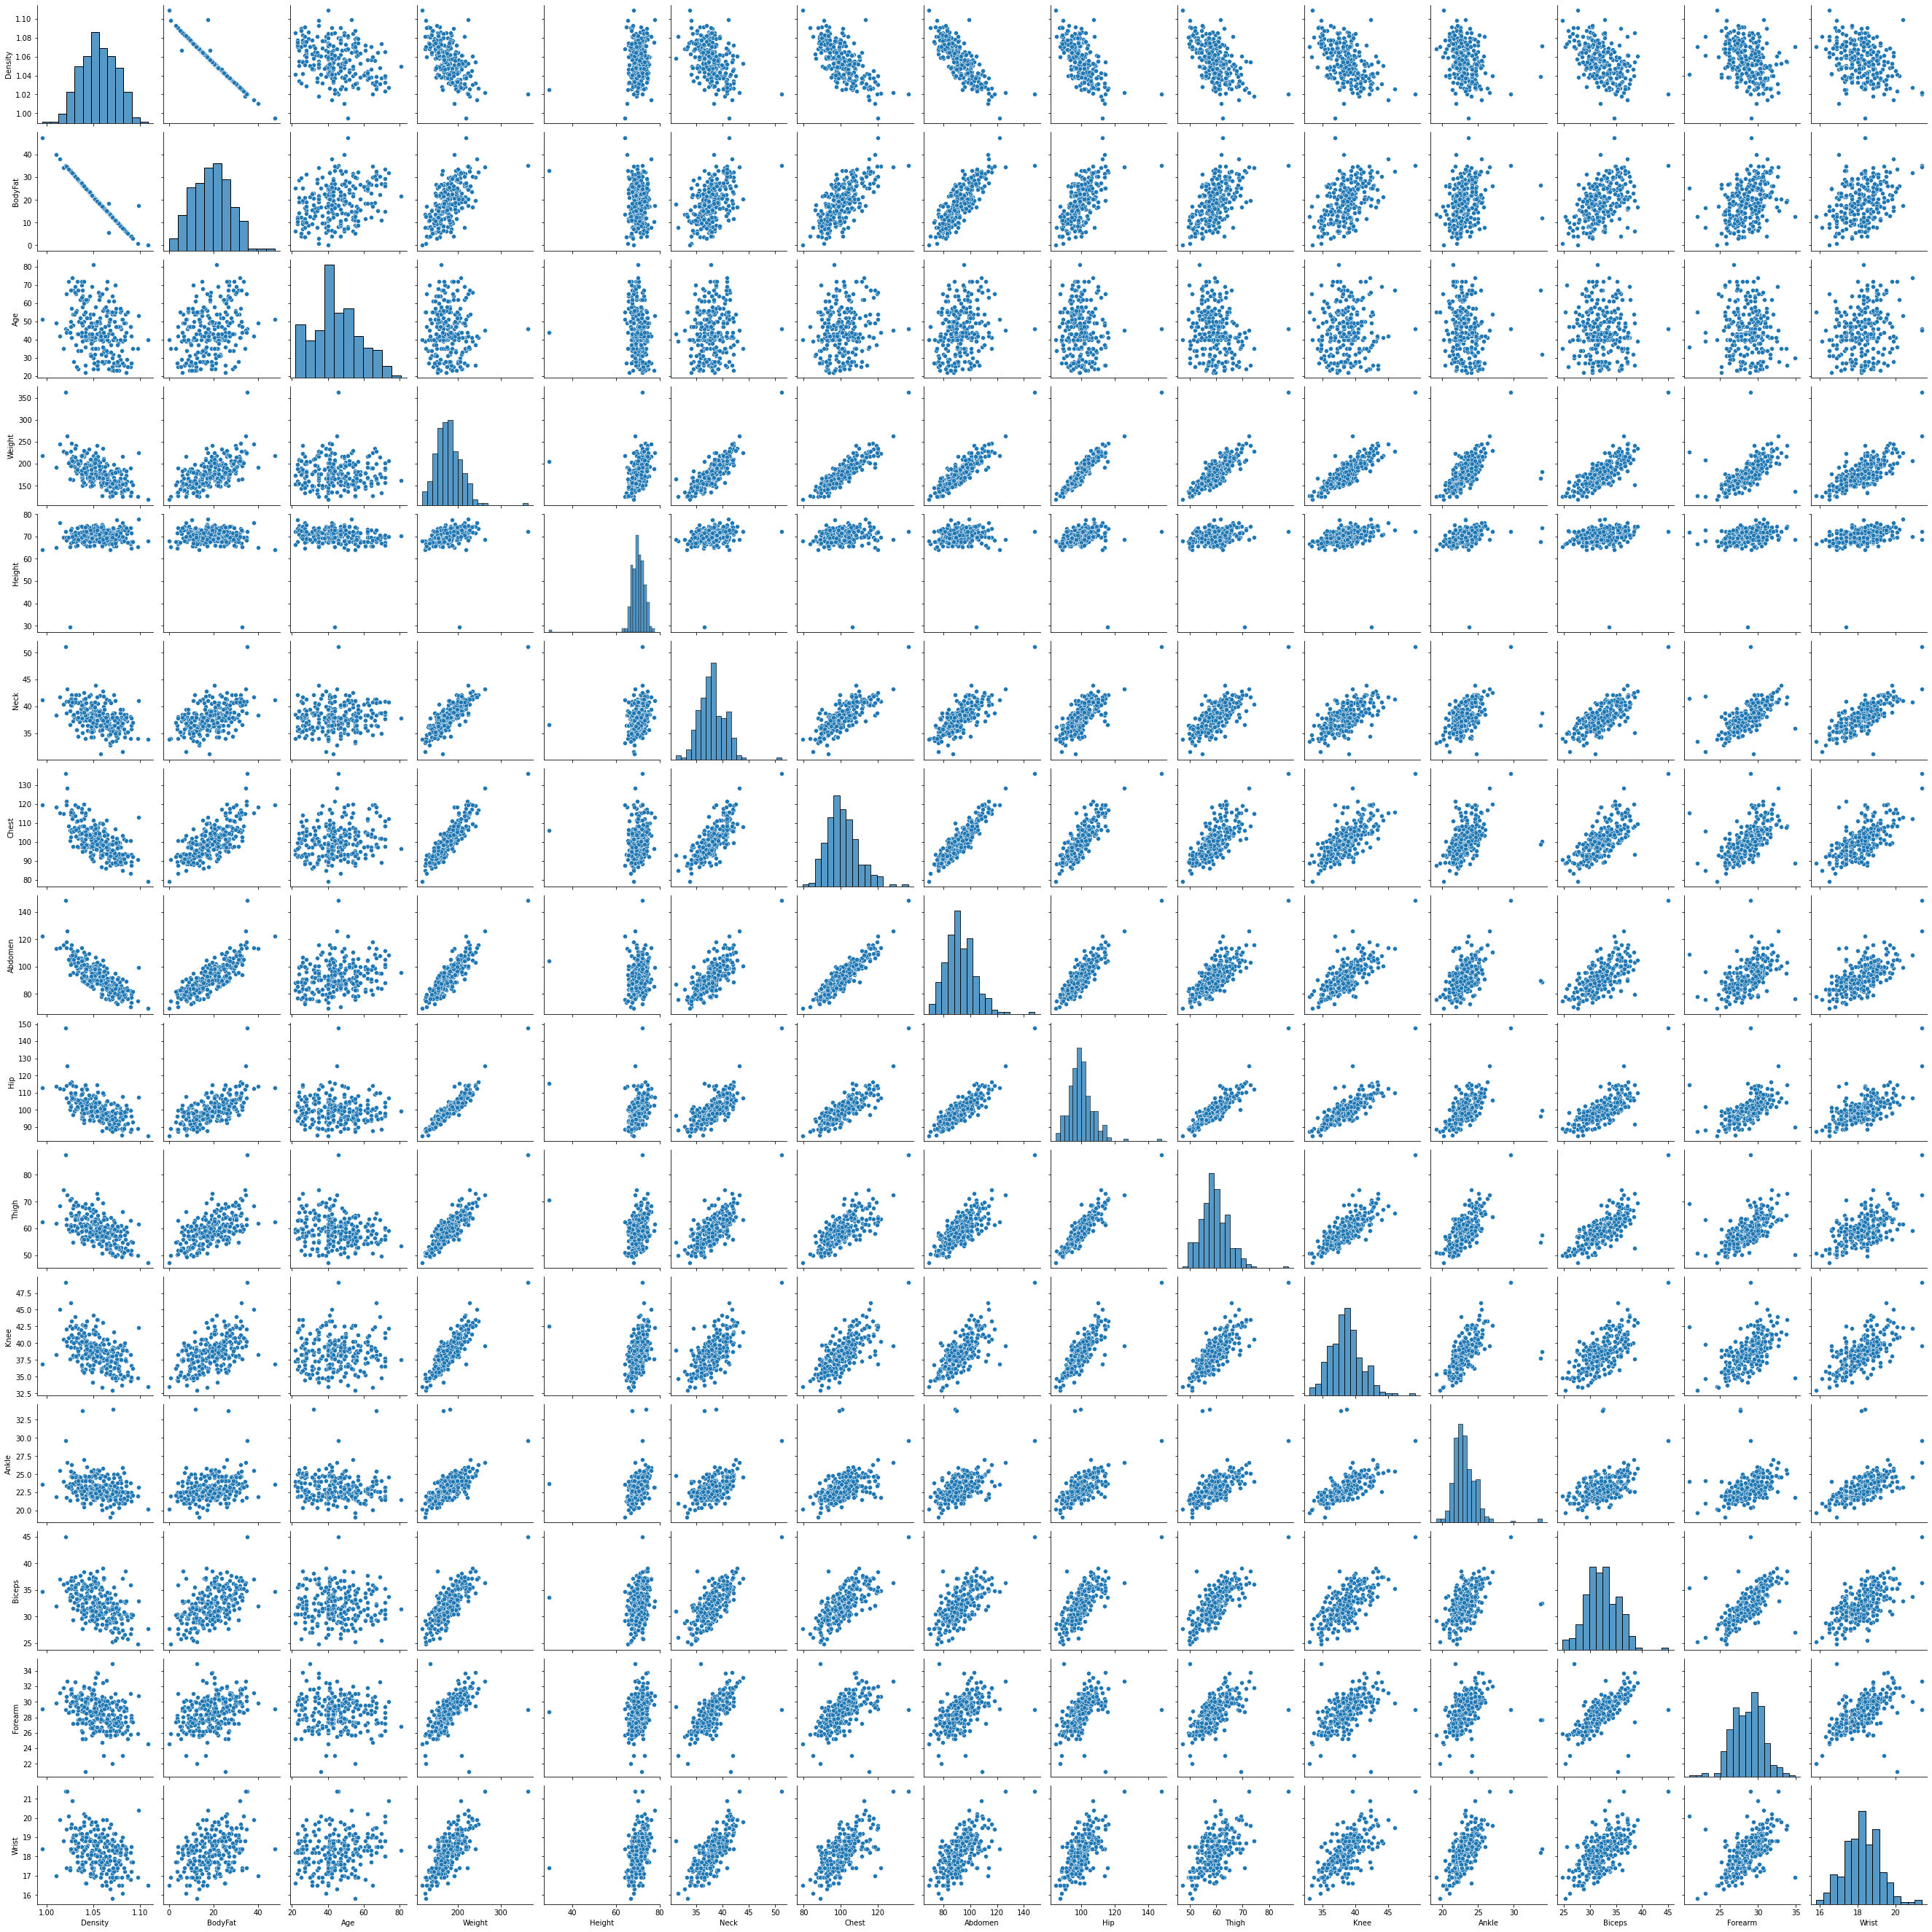

In [5]:
sns.pairplot(data)

In [8]:
correlation=data.corr()
print(correlation)

          Density   BodyFat       Age    Weight    Height      Neck     Chest  \
Density  1.000000 -0.987782 -0.277637 -0.594062  0.097881 -0.472966 -0.682599   
BodyFat -0.987782  1.000000  0.291458  0.612414 -0.089495  0.490592  0.702620   
Age     -0.277637  0.291458  1.000000 -0.012746 -0.171645  0.113505  0.176450   
Weight  -0.594062  0.612414 -0.012746  1.000000  0.308279  0.830716  0.894191   
Height   0.097881 -0.089495 -0.171645  0.308279  1.000000  0.253710  0.134892   
Neck    -0.472966  0.490592  0.113505  0.830716  0.253710  1.000000  0.784835   
Chest   -0.682599  0.702620  0.176450  0.894191  0.134892  0.784835  1.000000   
Abdomen -0.798955  0.813432  0.230409  0.887995  0.087813  0.754077  0.915828   
Hip     -0.609331  0.625201 -0.050332  0.940884  0.170394  0.734958  0.829420   
Thigh   -0.553091  0.559608 -0.200096  0.868694  0.148436  0.695697  0.729859   
Knee    -0.495040  0.508665  0.017516  0.853167  0.286053  0.672405  0.719496   
Ankle   -0.264890  0.265970 

<Axes: >

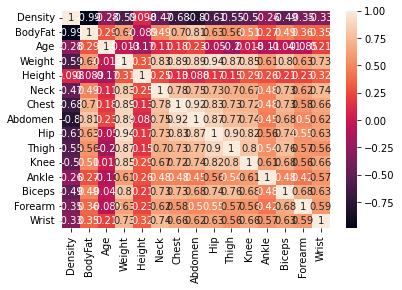

In [10]:
sns.heatmap(correlation,annot=True)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='BodyFat', ylabel='Density'>

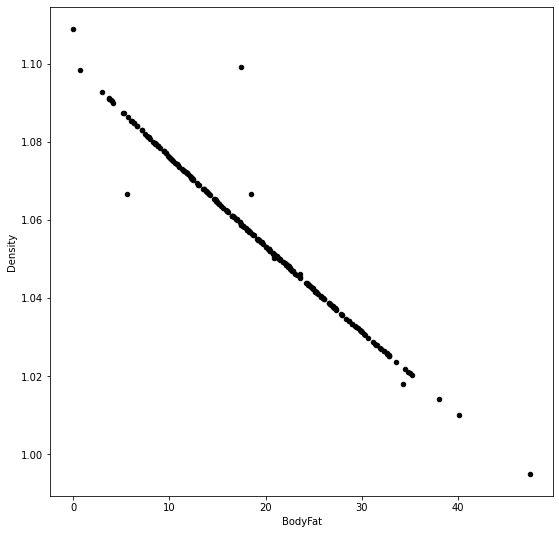

In [13]:
data.plot(kind='scatter', x='BodyFat', y='Density',figsize=(9,9),color='black')

In [15]:
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(X=pd.DataFrame(data['BodyFat']), y=data['Density'])
print('gia tri intercept:', model.intercept_)
print('gia tri coefficent:', model.coef_)
print('do chinh xac:', model.score(X=pd.DataFrame(data['BodyFat']), y=data['Density']))

gia tri intercept: 1.0985927274086462
gia tri coefficent: [-0.00224633]
do chinh xac: 0.9757140740248558


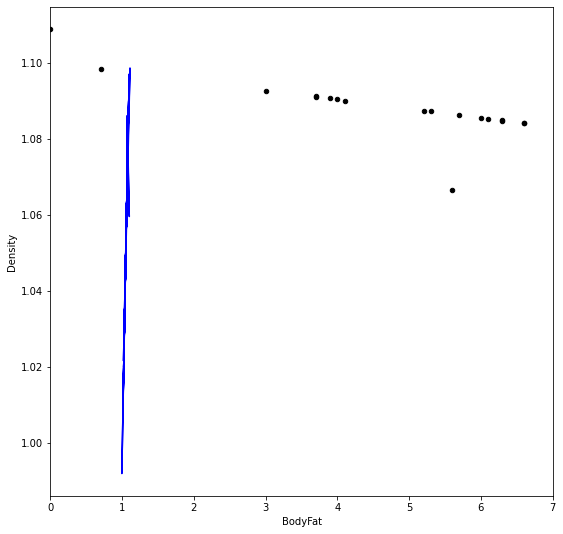

In [17]:
data.plot(kind='scatter', x='BodyFat', y='Density',figsize=(9,9),color='black',xlim=(0,7))
y_pred=model.predict(X=pd.DataFrame(data['BodyFat']))
plt.plot(data['Density'],y_pred,color='blue')

In [18]:
model=linear_model.LinearRegression()
X=pd.DataFrame([data['BodyFat'], data['BodyFat']**2]).T
model.fit(X,y=data['Density'])
print('gia tri intercept:', model.intercept_)
print('gia tri coefficent:', model.coef_)
print('do chinh xac:', model.score(X,y=data['Density']))
#mpg=-13,38*wt+1,17wt^2_49,93

gia tri intercept: 1.0995128684562945
gia tri coefficent: [-2.35985953e-03  2.87306540e-06]
do chinh xac: 0.9758953281877571


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


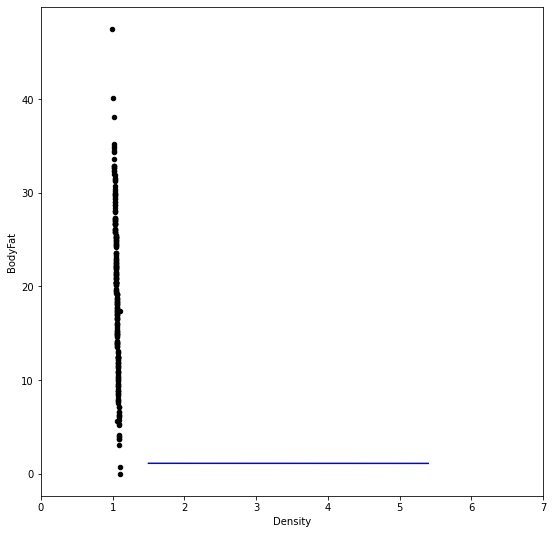

In [19]:
range=np.arange(1.5,5.5,0.1)
X_range=pd.DataFrame([range,range**2]).T
y_pred=model.predict(X=X_range)
data.plot(kind='scatter', x='Density', y='BodyFat',figsize=(9,9),color='black',xlim=(0,7))
plt.plot(range,y_pred,color='blue')

In [20]:
model=linear_model.LinearRegression()
model.fit(X=data.loc[:,['BodyFat','Abdomen',]],y=data['Density'])
print('gia tri intercept:', model.intercept_)
print('gia tri coefficent:', model.coef_)
print('do chinh xac:', model.score(X=data.loc[:,['BodyFat','Abdomen',]],y=data['Density']))
#mpg=-3,87wt-0,03hp+37,22

gia tri intercept: 1.0968762525139168
gia tri coefficent: [-2.27114547e-03  2.36807595e-05]
do chinh xac: 0.975774981620072
